<a href="https://colab.research.google.com/github/Tarnished2/DataScientist/blob/main/Exercise_8_Muklis_Pramaditya%20Ardian%20Saputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dengan menggunakan data passanger.csv, lakukanlah data preparation pada breakoutroom kali ini.

# Case 1

Berikan informasi-informasi terkait data passenger.

In [ ]:
# import dari google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import package
import os
import pandas as pd
import seaborn as sns

In [ ]:
# inisiasi directory
path = '/content/drive/MyDrive/SIB/3. Data Preparation using Python/3.1 Data Preparation using Python and EDA/'

In [ ]:
# cek isi directory
os.listdir(path)

['Exercise Notebook Meet 8 - Data Preparation I.ipynb',
 'sales.csv',
 'passenger.csv',
 '[REV] Meet 8 Data Preparation I.ipynb']

In [ ]:
# load data
df = pd.read_csv(path + 'passenger.csv')

In [ ]:
# menampilkan 5 teratas
df.head(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   892 non-null    int64  
 1   PassengerId  892 non-null    int64  
 2   Survived     892 non-null    int64  
 3   Pclass       892 non-null    int64  
 4   Name         892 non-null    object 
 5   Sex          892 non-null    object 
 6   Age          715 non-null    float64
 7   SibSp        892 non-null    int64  
 8   Parch        892 non-null    int64  
 9   Ticket       892 non-null    object 
 10  Fare         892 non-null    float64
 11  Cabin        205 non-null    object 
 12  Embarked     890 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.7+ KB


Bagaimana Summary Statistics dari data tersebut ?



In [ ]:
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,892.000000,892.000000,892.000000,892.000000,715.000000,892.000000,892.000000,892.000000
mean,445.500000,446.495516,0.384529,2.307175,29.684154,0.522422,0.381166,32.201737
std,257.642517,257.634789,0.486757,0.836750,14.521835,1.102264,0.805706,49.665589
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,223.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.917700
50%,445.500000,446.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.250000,669.250000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Case 2

Apakah terdapat Missing Values ?

In [ ]:
# cek missing value
missing = df.isnull().sum()
missing

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Apabila terdapat missing values, lakukanlah data cleaning.

In [ ]:
# menghitung rasio missing value
rasio = missing.div(len(df))
rasio

Unnamed: 0     0.000000
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198430
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.770179
Embarked       0.002242
dtype: float64

In [ ]:
# kabin memiliki missing value sebesar 77%, sehingga kolom kabin perlu didrop
df = df.drop(['Cabin'], axis=1)

In [ ]:
# mengubah NaNs dengan nilai Mean
df['Age'].fillna(int(df['Age'].mean()), inplace=True)

In [ ]:
# menghapus missing value dengan drop baris yang missing
df = df.dropna(axis=0, how="any")

In [ ]:
# cek missing value
df.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Case 3

Apakah terdapat data duplicate? 

In [ ]:
# mengecek apakah ada duplikat dengan acuan kolom PassengerId
df[df["PassengerId"].duplicated(keep=False)].sort_values("PassengerId")

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,S
891,891,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,S


Apabila terdapat duplicate, hapuslah data duplikasinya.

In [ ]:
# menghapus duplicate pada tabel
df = df.drop_duplicates(subset=['PassengerId']).reset_index()

In [ ]:
# cek apakah masih ada duplikat?
df[df["PassengerId"].duplicated(keep=False)].sort_values("PassengerId")

,index,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        889 non-null    int64  
 1   Unnamed: 0   889 non-null    int64  
 2   PassengerId  889 non-null    int64  
 3   Survived     889 non-null    int64  
 4   Pclass       889 non-null    int64  
 5   Name         889 non-null    object 
 6   Sex          889 non-null    object 
 7   Age          889 non-null    float64
 8   SibSp        889 non-null    int64  
 9   Parch        889 non-null    int64  
 10  Ticket       889 non-null    object 
 11  Fare         889 non-null    float64
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(7), object(4)
memory usage: 90.4+ KB


# Case 4

Data pada kolom Age memiliki tipe data float, ubahlah tipe data Age menjadi integer.

In [ ]:
# ubah data type
df['Age'] = df['Age'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        889 non-null    int64  
 1   Unnamed: 0   889 non-null    int64  
 2   PassengerId  889 non-null    int64  
 3   Survived     889 non-null    int64  
 4   Pclass       889 non-null    int64  
 5   Name         889 non-null    object 
 6   Sex          889 non-null    object 
 7   Age          889 non-null    int64  
 8   SibSp        889 non-null    int64  
 9   Parch        889 non-null    int64  
 10  Ticket       889 non-null    object 
 11  Fare         889 non-null    float64
 12  Embarked     889 non-null    object 
dtypes: float64(1), int64(8), object(4)
memory usage: 90.4+ KB


# Case 5

Hitunglah jumlah penumpang berdasar jenis kelaminnya!

In [ ]:
df.groupby('Sex')['PassengerId'].count()

Sex
female    312
male      577
Name: PassengerId, dtype: int64

Kelompokkan jumlah penumpang berdasar kolom embarked

In [ ]:
df.groupby('Embarked')['PassengerId'].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

Lakukan penggabungan pengelompokan berdasar kedua pengelompokan sebelumnya yaitu berdasar embarked dan jenis kelamin.

In [ ]:
df.groupby(by=['Embarked','Sex']).count()[['PassengerId']]

PassengerId
Embarked Sex                
C        female           73
         male             95
Q        female           36
         male             41
S        female          203
         male            441

# Case 6

Berapakah rata-rata usia penumpang?

In [ ]:
rata_usia = df['Age'].mean()
print(f"rata-rata usia penumpang adalah {rata_usia} tahun")

rata-rata usia penumpang adalah 29.498312710911136 tahun


Berapa rata-rata tarif penumpang?

In [ ]:
rata_tarif = df['Fare'].mean()
print(f"rata-rata tarif penumpang adalah {rata_tarif}")

rata-rata tarif penumpang adalah 32.09668087739032


Berapa rata-rata tarif setiap kelasnya?

In [ ]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Buatlah chart, dengan melihat berapa banyak yang selamat pada jenis kelamin laki-laki dan perempuan

<Axes: xlabel='Sex', ylabel='count'>

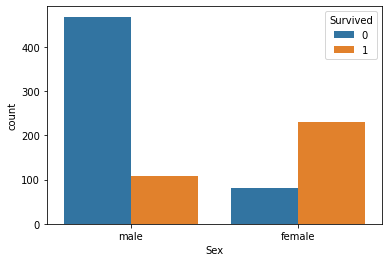

In [ ]:
sns.countplot(x=df['Sex'], hue=df['Survived'])